In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [182]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')

In [183]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [184]:
# Features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [185]:
# Split the dataset into train, test, validation (70:15:15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [186]:
# Sigmoid function with clipping
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow
    return 1 / (1 + np.exp(-z))

In [187]:
# Cross-entropy loss function with clipping
def compute_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [188]:
# Accuracy calculation
def calculate_accuracy(y_true, y_pred):
    y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]
    return np.mean(y_true == y_pred_classes)

In [189]:
# Gradient Descent for Logistic Regression
def gradient_descent(X, y, X_val, y_val, lr=0.01, num_iters=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iters):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute train loss and accuracy
        train_loss = compute_loss(y, y_pred)
        train_accuracy = calculate_accuracy(y, y_pred)
        
        # Validation forward pass
        val_linear_model = np.dot(X_val, weights) + bias
        val_pred = sigmoid(val_linear_model)
        
        # Compute validation loss and accuracy
        val_loss = compute_loss(y_val, val_pred)
        val_accuracy = calculate_accuracy(y_val, val_pred)
        
        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

# Run gradient descent
weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
    X_train, y_train, X_val, y_val, lr=0.01, num_iters=1000
)

In [190]:
# Print final metrics
print("\nFinal Metrics:")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")


Final Metrics:
Final Training Loss: 3.5400
Final Validation Loss: 3.2584
Final Training Accuracy: 0.8463
Final Validation Accuracy: 0.8585


Text(0, 0.5, 'Loss')

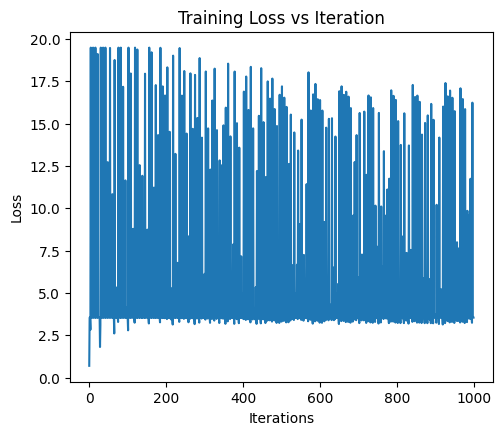

In [191]:
# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title("Training Loss vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

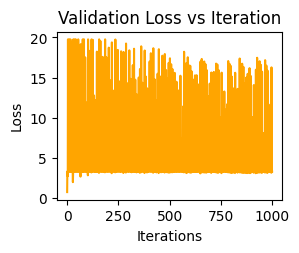

In [192]:
plt.subplot(2, 2, 2)
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title("Validation Loss vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

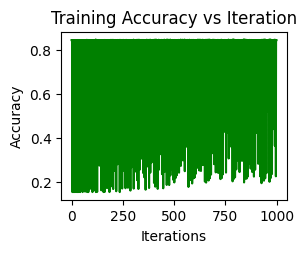

In [193]:
plt.subplot(2, 2, 3)
plt.plot(train_accuracies, label='Training Accuracy', color='green')
plt.title("Training Accuracy vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

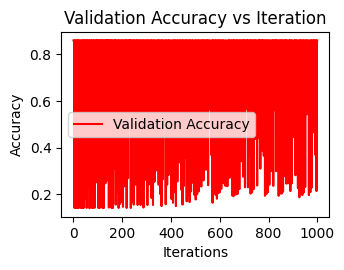

In [194]:
plt.subplot(2, 2, 4)
plt.plot(val_accuracies, label='Validation Accuracy', color='red')
plt.title("Validation Accuracy vs Iteration")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend()
plt.show()

# B

In [195]:
# Min-max scaling function
def min_max_scaling(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [196]:
# Run gradient descent with no scaling
weights_no_scaling, bias_no_scaling, train_losses_no_scaling, val_losses_no_scaling, train_accuracies_no_scaling, val_accuracies_no_scaling = gradient_descent(
    X_train, y_train, X_val, y_val, lr=0.01, num_iters=1000
)

In [197]:
# Run gradient descent with min-max scaling
X_train_scaled = min_max_scaling(X_train)
X_val_scaled = min_max_scaling(X_val)

weights_scaled, bias_scaled, train_losses_min_max_scaling, val_losses_min_max_scaling, train_accuracies_min_max_scaling, val_accuracies_min_max_scaling = gradient_descent(
    X_train_scaled, y_train, X_val_scaled, y_val, lr=0.01, num_iters=1000
)

In [198]:
# Print final metrics for no scaling
print("\nFinal Metrics (No Scaling):")
print(f"Final Training Loss: {train_losses_no_scaling[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_no_scaling[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies_no_scaling[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies_no_scaling[-1]:.4f}")


Final Metrics (No Scaling):
Final Training Loss: 3.5400
Final Validation Loss: 3.2584
Final Training Accuracy: 0.8463
Final Validation Accuracy: 0.8585


In [199]:
# Print final metrics for min-max scaling
print("\nFinal Metrics (Min-Max Scaling):")
print(f"Final Training Loss: {train_losses_min_max_scaling[-1]:.4f}")
print(f"Final Validation Loss: {val_losses_min_max_scaling[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies_min_max_scaling[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies_min_max_scaling[-1]:.4f}")


Final Metrics (Min-Max Scaling):
Final Training Loss: 0.4413
Final Validation Loss: 0.4190
Final Training Accuracy: 0.8463
Final Validation Accuracy: 0.8585


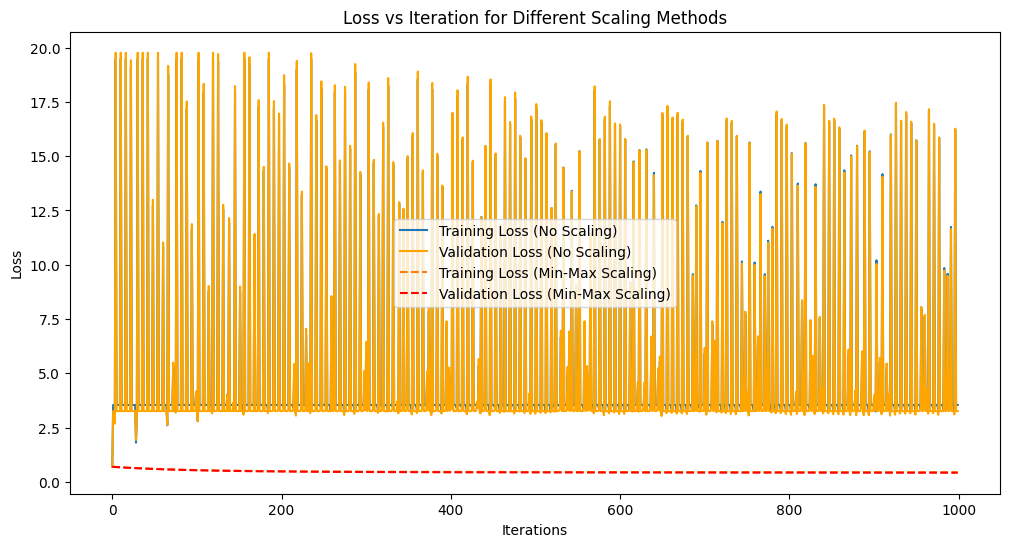

In [200]:
# Plotting Loss vs Iteration for each scaling method
plt.figure(figsize=(12, 6))

plt.plot(train_losses_no_scaling, label='Training Loss (No Scaling)')
plt.plot(val_losses_no_scaling, label='Validation Loss (No Scaling)', color='orange')
plt.plot(train_losses_min_max_scaling, label='Training Loss (Min-Max Scaling)', linestyle='--')
plt.plot(val_losses_min_max_scaling, label='Validation Loss (Min-Max Scaling)', color='red', linestyle='--')

plt.title("Loss vs Iteration for Different Scaling Methods")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

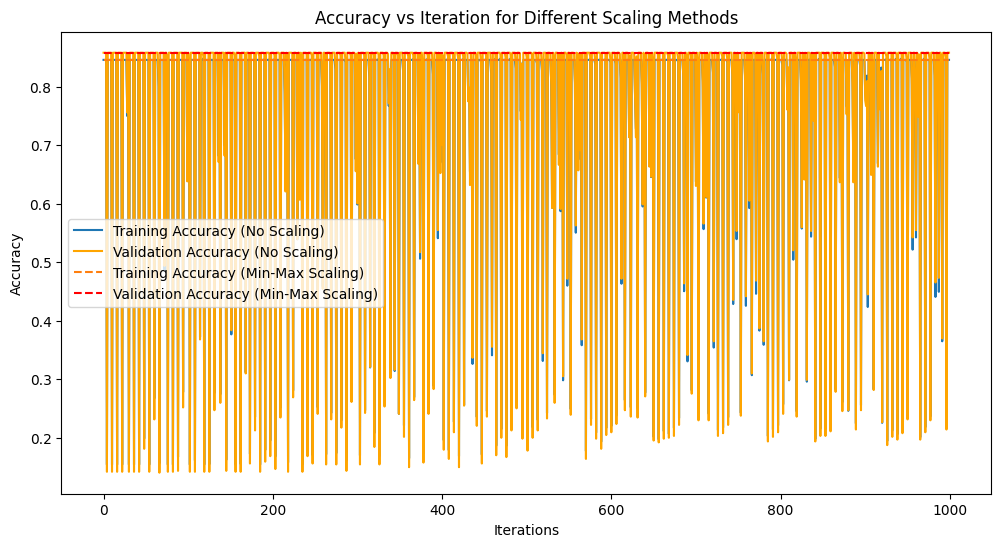

In [201]:
# Plotting Accuracy vs Iteration for each scaling method
plt.figure(figsize=(12, 6))

plt.plot(train_accuracies_no_scaling, label='Training Accuracy (No Scaling)')
plt.plot(val_accuracies_no_scaling, label='Validation Accuracy (No Scaling)', color='orange')
plt.plot(train_accuracies_min_max_scaling, label='Training Accuracy (Min-Max Scaling)', linestyle='--')
plt.plot(val_accuracies_min_max_scaling, label='Validation Accuracy (Min-Max Scaling)', color='red', linestyle='--')

plt.title("Accuracy vs Iteration for Different Scaling Methods")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# C

In [202]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [203]:
def gradient_descent(X, y, X_val, y_val, lr=0.01, num_iters=1000):
    m, n = X.shape
    weights = np.random.randn(n) * 0.01  # Small random initialization
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iters):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute train loss and accuracy
        train_loss = compute_loss(y, y_pred)
        train_accuracy = calculate_accuracy(y, y_pred)
        
        # Validation forward pass
        val_linear_model = np.dot(X_val, weights) + bias
        val_pred = sigmoid(val_linear_model)
        
        # Compute validation loss and accuracy
        val_loss = compute_loss(y_val, val_pred)
        val_accuracy = calculate_accuracy(y_val, val_pred)
        
        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies, val_pred

In [204]:
# Run gradient descent with no scaling
weights_no_scaling, bias_no_scaling, train_losses_no_scaling, val_losses_no_scaling, train_accuracies_no_scaling, val_accuracies_no_scaling, val_preds_no_scaling = gradient_descent(
    X_train, y_train, X_val, y_val, lr=0.2, num_iters=1000
)

In [205]:
# Run gradient descent with min-max scaling
X_train_scaled = min_max_scaling(X_train)
X_val_scaled = min_max_scaling(X_val)

weights_scaled, bias_scaled, train_losses_scaled, val_losses_scaled, train_accuracies_scaled, val_accuracies_scaled, val_preds_scaled = gradient_descent(
    X_train_scaled, y_train, X_val_scaled, y_val, lr=0.2, num_iters=1000
)

In [206]:
# Convert continuous predictions to binary for no scaling
y_val_preds_binary_no_scaling = [1 if i > 0.5 else 0 for i in val_preds_no_scaling]

In [207]:
# Calculate metrics for no scaling
conf_matrix_no_scaling = confusion_matrix(y_val, y_val_preds_binary_no_scaling)
precision_no_scaling = precision_score(y_val, y_val_preds_binary_no_scaling, zero_division=1)
recall_no_scaling = recall_score(y_val, y_val_preds_binary_no_scaling, zero_division=1)
f1_no_scaling = f1_score(y_val, y_val_preds_binary_no_scaling, zero_division=1)
roc_auc_no_scaling = roc_auc_score(y_val, val_preds_no_scaling)

In [208]:
# Print metrics for no scaling
print("\nConfusion Matrix (No Scaling):")
print(conf_matrix_no_scaling)

print(f"\nPrecision (No Scaling): {precision_no_scaling:.4f}")
print(f"Recall (No Scaling): {recall_no_scaling:.4f}")
print(f"F1 Score (No Scaling): {f1_no_scaling:.4f}")
print(f"ROC-AUC Score (No Scaling): {roc_auc_no_scaling:.4f}")


Confusion Matrix (No Scaling):
[[546   0]
 [ 90   0]]

Precision (No Scaling): 1.0000
Recall (No Scaling): 0.0000
F1 Score (No Scaling): 0.0000
ROC-AUC Score (No Scaling): 0.5000


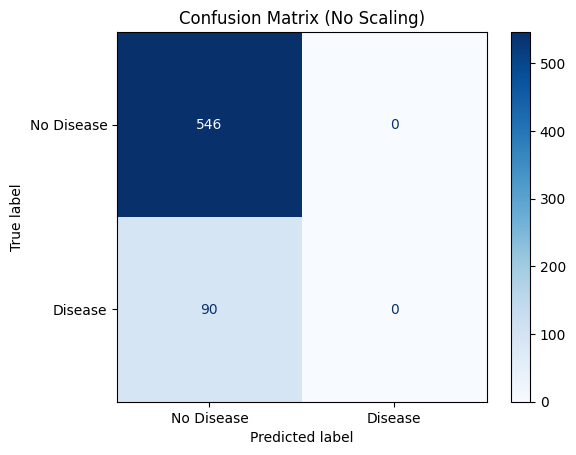

In [209]:
# Plot Confusion Matrix for no scaling
disp_no_scaling = ConfusionMatrixDisplay(conf_matrix_no_scaling, display_labels=['No Disease', 'Disease'])
disp_no_scaling.plot(cmap='Blues')
plt.title('Confusion Matrix (No Scaling)')
plt.show()

In [210]:
# Convert continuous predictions to binary for scaled data
y_val_preds_binary_scaled = [1 if i > 0.5 else 0 for i in val_preds_scaled]

In [211]:
# Calculate metrics for scaled data
conf_matrix_scaled = confusion_matrix(y_val, y_val_preds_binary_scaled)
precision_scaled = precision_score(y_val, y_val_preds_binary_scaled, zero_division=1)
recall_scaled = recall_score(y_val, y_val_preds_binary_scaled, zero_division=1)
f1_scaled = f1_score(y_val, y_val_preds_binary_scaled, zero_division=1)
roc_auc_scaled = roc_auc_score(y_val, val_preds_scaled)

In [212]:
# Print metrics for scaled data
print("\nConfusion Matrix (Scaled):")
print(conf_matrix_scaled)

print(f"\nPrecision (Scaled): {precision_scaled:.4f}")
print(f"Recall (Scaled): {recall_scaled:.4f}")
print(f"F1 Score (Scaled): {f1_scaled:.4f}")
print(f"ROC-AUC Score (Scaled): {roc_auc_scaled:.4f}")


Confusion Matrix (Scaled):
[[546   0]
 [ 90   0]]

Precision (Scaled): 1.0000
Recall (Scaled): 0.0000
F1 Score (Scaled): 0.0000
ROC-AUC Score (Scaled): 0.7211


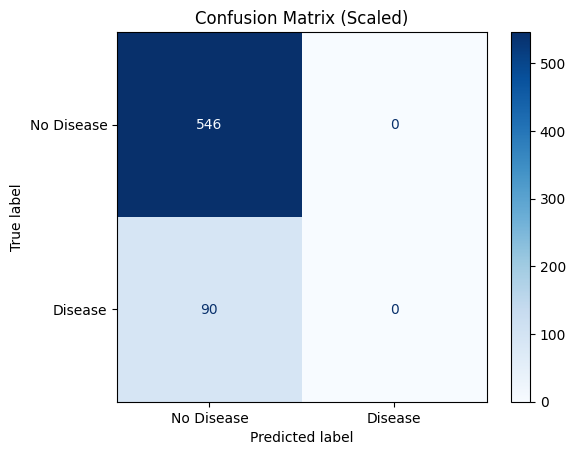

In [213]:
# Plot Confusion Matrix for scaled data
disp_scaled = ConfusionMatrixDisplay(conf_matrix_scaled, display_labels=['No Disease', 'Disease'])
disp_scaled.plot(cmap='Blues')
plt.title('Confusion Matrix (Scaled)')
plt.show()

# D

Running Mini-Batch Gradient Descent with batch size 4...
Running Mini-Batch Gradient Descent with batch size 32...
Running Mini-Batch Gradient Descent with batch size 64...
Running Stochastic Gradient Descent with batch size 4...
Running Stochastic Gradient Descent with batch size 16...
Running Stochastic Gradient Descent with batch size 32...


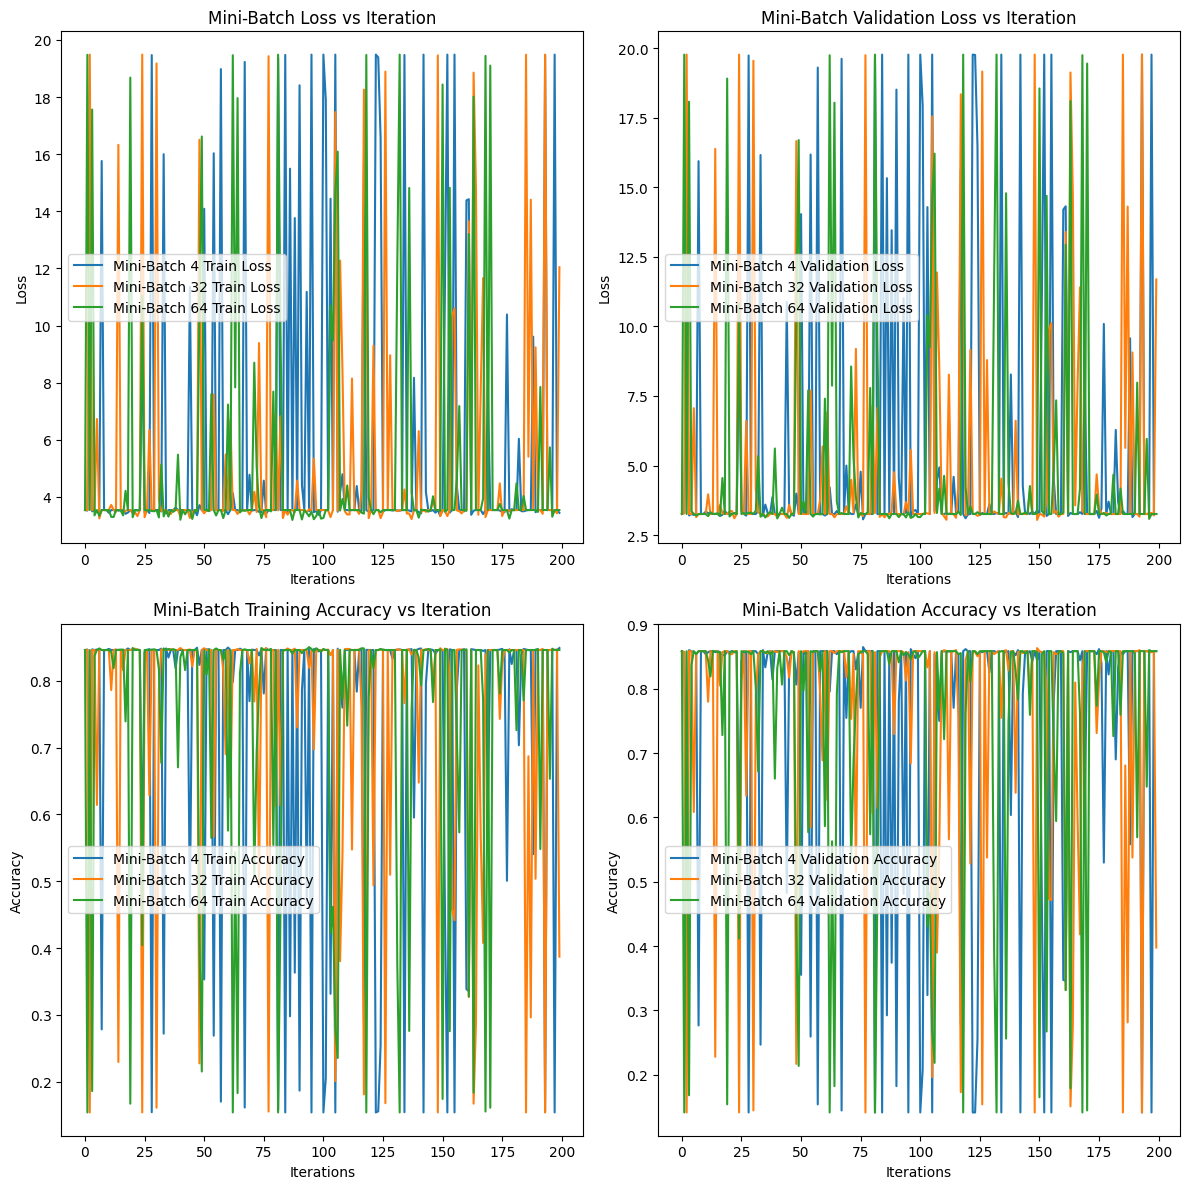

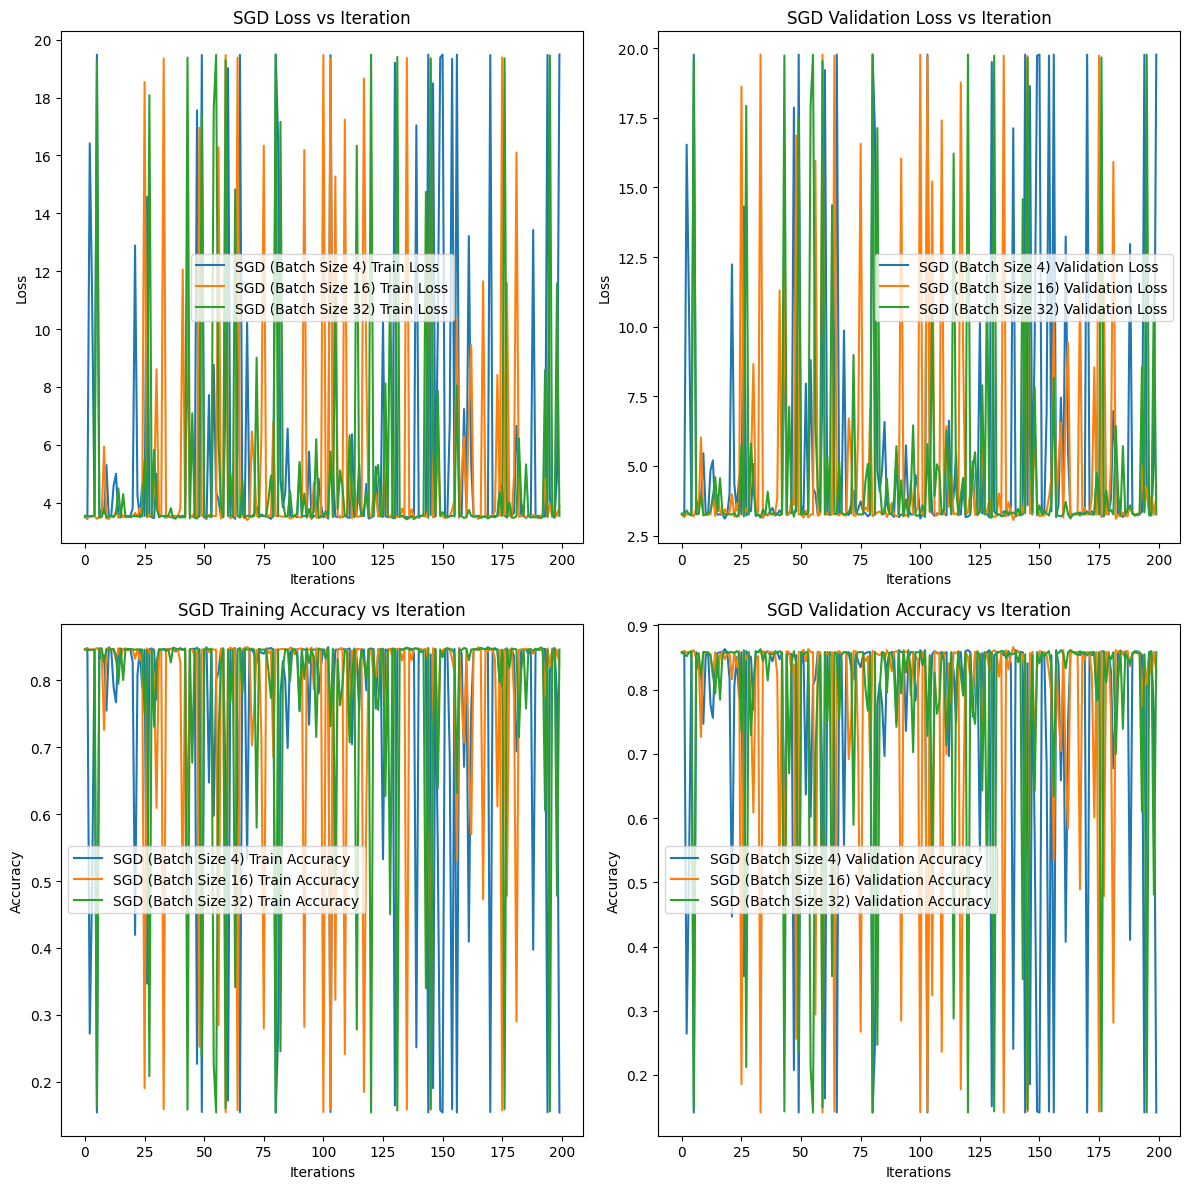

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Features and target
X = df.drop(columns=['HeartDisease']).values  # Convert to numpy array
y = df['HeartDisease'].values  # Convert to numpy array

# Split the dataset into train, test, validation (70:15:15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def min_max_scaling(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Sigmoid function with clipping
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function with clipping
def compute_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Accuracy calculation
def calculate_accuracy(y_true, y_pred):
    y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]
    return np.mean(y_true == y_pred_classes)

# Mini-Batch Gradient Descent function
def mini_batch_gradient_descent(X, y, X_val, y_val, batch_size, lr=0.01, num_iters=200):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iters):
        # Shuffle data
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Mini-batch gradient descent
        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Forward pass
            linear_model = np.dot(X_batch, weights) + bias
            y_pred = sigmoid(linear_model)

            # Compute loss
            loss = compute_loss(y_batch, y_pred)

            # Compute gradients
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch)

            # Update weights and bias
            weights -= lr * dw
            bias -= lr * db

        # Forward pass on the entire training set
        train_pred = sigmoid(np.dot(X, weights) + bias)
        val_pred = sigmoid(np.dot(X_val, weights) + bias)

        # Compute metrics
        train_loss = compute_loss(y, train_pred)
        val_loss = compute_loss(y_val, val_pred)
        train_accuracy = calculate_accuracy(y, train_pred)
        val_accuracy = calculate_accuracy(y_val, val_pred)

        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

def stochastic_gradient_descent(X, y, X_val, y_val, lr=0.01, num_iters=200):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iters):
        # Shuffle data
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # SGD
        for j in range(m):
            X_i = X_shuffled[j:j+1]  # X_i has shape (1, n)
            y_i = y_shuffled[j:j+1]  # y_i has shape (1,)

            # Forward pass
            linear_model = np.dot(X_i, weights) + bias
            y_pred = sigmoid(linear_model)

            # Compute loss
            loss = compute_loss(y_i, y_pred)

            # Compute gradients
            dw = (y_pred - y_i) * X_i.flatten()  # Flatten X_i to match weights shape
            db = (y_pred - y_i)

            # Update weights and bias
            weights -= lr * dw
            bias -= lr * db

        # Forward pass on the entire training set
        train_pred = sigmoid(np.dot(X, weights) + bias)
        val_pred = sigmoid(np.dot(X_val, weights) + bias)

        # Compute metrics
        train_loss = compute_loss(y, train_pred)
        val_loss = compute_loss(y_val, val_pred)
        train_accuracy = calculate_accuracy(y, train_pred)
        val_accuracy = calculate_accuracy(y_val, val_pred)

        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies


# Run mini-batch gradient descent with different batch sizes
mini_batch_sizes = [4, 32, 64]
mini_batch_results = {}

for batch_size in mini_batch_sizes:
    print(f"Running Mini-Batch Gradient Descent with batch size {batch_size}...")
    weights_mb, bias_mb, train_losses_mb, val_losses_mb, train_accuracies_mb, val_accuracies_mb = mini_batch_gradient_descent(
        X_train, y_train, X_val, y_val, batch_size=batch_size, lr=0.01, num_iters=200
    )
    mini_batch_results[batch_size] = (train_losses_mb, val_losses_mb, train_accuracies_mb, val_accuracies_mb)

# Run stochastic gradient descent with different batch sizes (essentially just SGD here)
sgd_batch_sizes = [4, 16, 32]
sgd_results = {}

for batch_size in sgd_batch_sizes:
    print(f"Running Stochastic Gradient Descent with batch size {batch_size}...")
    weights_sgd, bias_sgd, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd = stochastic_gradient_descent(
        X_train, y_train, X_val, y_val, lr=0.01, num_iters=200
    )
    sgd_results[batch_size] = (train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd)

# Plotting Loss vs Iteration for each batch size
plt.figure(figsize=(12, 12))

# Mini-Batch Gradient Descent Plots
plt.subplot(2, 2, 1)
for batch_size in mini_batch_sizes:
    plt.plot(mini_batch_results[batch_size][0], label=f'Mini-Batch {batch_size} Train Loss')
plt.title('Mini-Batch Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
for batch_size in mini_batch_sizes:
    plt.plot(mini_batch_results[batch_size][1], label=f'Mini-Batch {batch_size} Validation Loss')
plt.title('Mini-Batch Validation Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
for batch_size in mini_batch_sizes:
    plt.plot(mini_batch_results[batch_size][2], label=f'Mini-Batch {batch_size} Train Accuracy')
plt.title('Mini-Batch Training Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
for batch_size in mini_batch_sizes:
    plt.plot(mini_batch_results[batch_size][3], label=f'Mini-Batch {batch_size} Validation Accuracy')
plt.title('Mini-Batch Validation Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting Loss vs Iteration for Stochastic Gradient Descent
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
for batch_size in sgd_batch_sizes:
    plt.plot(sgd_results[batch_size][0], label=f'SGD (Batch Size {batch_size}) Train Loss')
plt.title('SGD Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
for batch_size in sgd_batch_sizes:
    plt.plot(sgd_results[batch_size][1], label=f'SGD (Batch Size {batch_size}) Validation Loss')
plt.title('SGD Validation Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
for batch_size in sgd_batch_sizes:
    plt.plot(sgd_results[batch_size][2], label=f'SGD (Batch Size {batch_size}) Train Accuracy')
plt.title('SGD Training Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
for batch_size in sgd_batch_sizes:
    plt.plot(sgd_results[batch_size][3], label=f'SGD (Batch Size {batch_size}) Validation Accuracy')
plt.title('SGD Validation Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# E

Running k-fold cross-validation with learning rate: 0.001
Running k-fold cross-validation with learning rate: 0.05
Running k-fold cross-validation with learning rate: 0.01
Running k-fold cross-validation with learning rate: 0.5
Running k-fold cross-validation with learning rate: 0.1
Running k-fold cross-validation with learning rate: 1

Best Result:
Learning Rate: 1
Validation Accuracy: 0.6576 ± 0.0180
Validation Precision: 0.2491 ± 0.0223
Validation Recall: 0.6204 ± 0.0550
Validation F1 Score: 0.3547 ± 0.0267


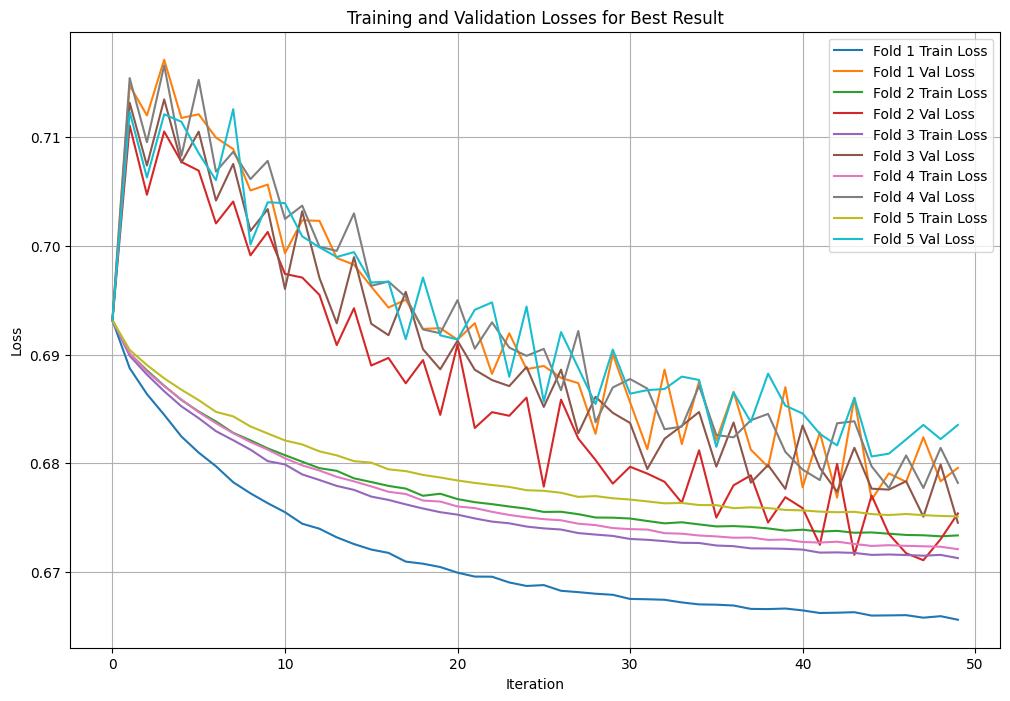

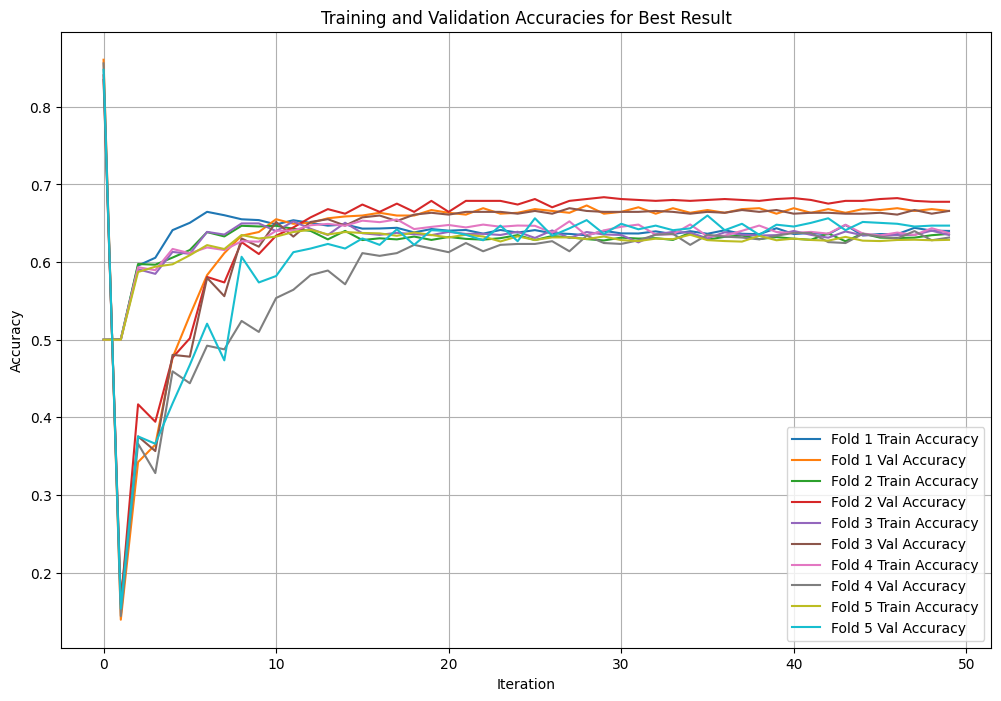

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Min-max scaling function
def min_max_scaling(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Apply min-max scaling
X = min_max_scaling(X).values
y = y.values

# Sigmoid function with clipping
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function with clipping
def compute_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Accuracy calculation
def calculate_accuracy(y_true, y_pred):
    y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]
    return np.mean(y_true == y_pred_classes)

# Gradient Descent for Logistic Regression with Regularization
def gradient_descent(X, y, X_val, y_val, lr=0.01, num_iters=1000, l1_reg=0.0, l2_reg=0.0):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for i in range(num_iters):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute train loss and accuracy
        train_loss = compute_loss(y, y_pred) + l1_reg * np.sum(np.abs(weights)) + l2_reg * np.sum(weights**2)
        train_accuracy = calculate_accuracy(y, y_pred)
        
        # Validation forward pass
        val_linear_model = np.dot(X_val, weights) + bias
        val_pred = sigmoid(val_linear_model)
        
        # Compute validation loss and accuracy
        val_loss = compute_loss(y_val, val_pred) + l1_reg * np.sum(np.abs(weights)) + l2_reg * np.sum(weights**2)
        val_accuracy = calculate_accuracy(y_val, val_pred)
        
        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) + l1_reg * np.sign(weights) + 2 * l2_reg * weights
        db = (1 / m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5, lr=0.01, num_iters=1000, l1_reg=0.0, l2_reg=0.0):
    fold_size = len(X) // k
    indices = np.random.permutation(len(X))
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    fold_metrics = []

    for i in range(k):
        val_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_val = X[train_indices], X[val_indices]
        y_train, y_val = y[train_indices], y[val_indices]

        # Handle class imbalance by oversampling the minority class
        X_train_minority, y_train_minority = resample(X_train[y_train == 1], y_train[y_train == 1],
                                                      replace=True, n_samples=len(y_train[y_train == 0]), random_state=42)
        X_train = np.vstack((X_train_minority, X_train[y_train == 0]))
        y_train = np.hstack((y_train_minority, y_train[y_train == 0]))

        weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
            X_train, y_train, X_val, y_val, lr, num_iters, l1_reg, l2_reg)

        # Validation predictions
        val_pred = sigmoid(np.dot(X_val, weights) + bias)
        val_pred_classes = [1 if i > 0.5 else 0 for i in val_pred]

        # Compute metrics
        accuracy = calculate_accuracy(y_val, val_pred)
        precision = precision_score(y_val, val_pred_classes, zero_division=0)
        recall = recall_score(y_val, val_pred_classes, zero_division=0)
        f1 = f1_score(y_val, val_pred_classes, zero_division=0)

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)

        fold_metrics.append({
            'fold': i + 1,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies
        })

    # Calculate average and standard deviation of metrics
    results = {metric: (np.mean(values), np.std(values)) for metric, values in metrics.items()}
    return results, fold_metrics

# Define learning rates to experiment with
learning_rates = [0.001, 0.05, 0.01, 0.5, 0.1, 1]

# Store results
results = []

# Experiment with different learning rates
for lr in learning_rates:
    print(f"Running k-fold cross-validation with learning rate: {lr}")
    result, fold_metrics = k_fold_cross_validation(X, y, k=5, lr=lr, num_iters=50, l1_reg=0.01, l2_reg=0.01)
    results.append({
        'lr': lr,
        'result': result,
        'fold_metrics': fold_metrics
    })

# Find the best result based on F1 score
best_result = max(results, key=lambda x: x['result']['f1'][0])

print("\nBest Result:")
print(f"Learning Rate: {best_result['lr']}")
print(f"Validation Accuracy: {best_result['result']['accuracy'][0]:.4f} ± {best_result['result']['accuracy'][1]:.4f}")
print(f"Validation Precision: {best_result['result']['precision'][0]:.4f} ± {best_result['result']['precision'][1]:.4f}")
print(f"Validation Recall: {best_result['result']['recall'][0]:.4f} ± {best_result['result']['recall'][1]:.4f}")
print(f"Validation F1 Score: {best_result['result']['f1'][0]:.4f} ± {best_result['result']['f1'][1]:.4f}")

# Plot training and validation losses for the best result
plt.figure(figsize=(12, 8))
for fold_metric in best_result['fold_metrics']:
    plt.plot(fold_metric['train_losses'], label=f"Fold {fold_metric['fold']} Train Loss")
    plt.plot(fold_metric['val_losses'], label=f"Fold {fold_metric['fold']} Val Loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Best Result')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracies for the best result
plt.figure(figsize=(12, 8))
for fold_metric in best_result['fold_metrics']:
    plt.plot(fold_metric['train_accuracies'], label=f"Fold {fold_metric['fold']} Train Accuracy")
    plt.plot(fold_metric['val_accuracies'], label=f"Fold {fold_metric['fold']} Val Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Best Result')
plt.legend()
plt.grid(True)
plt.show()

# F


Best Result:
Learning Rate: 0.5
L1 Regularization: 0.01
L2 Regularization: 1
Validation Accuracy: 0.8097
Validation Precision: 0.3551
Validation Recall: 0.4222
Validation F1 Score: 0.3858


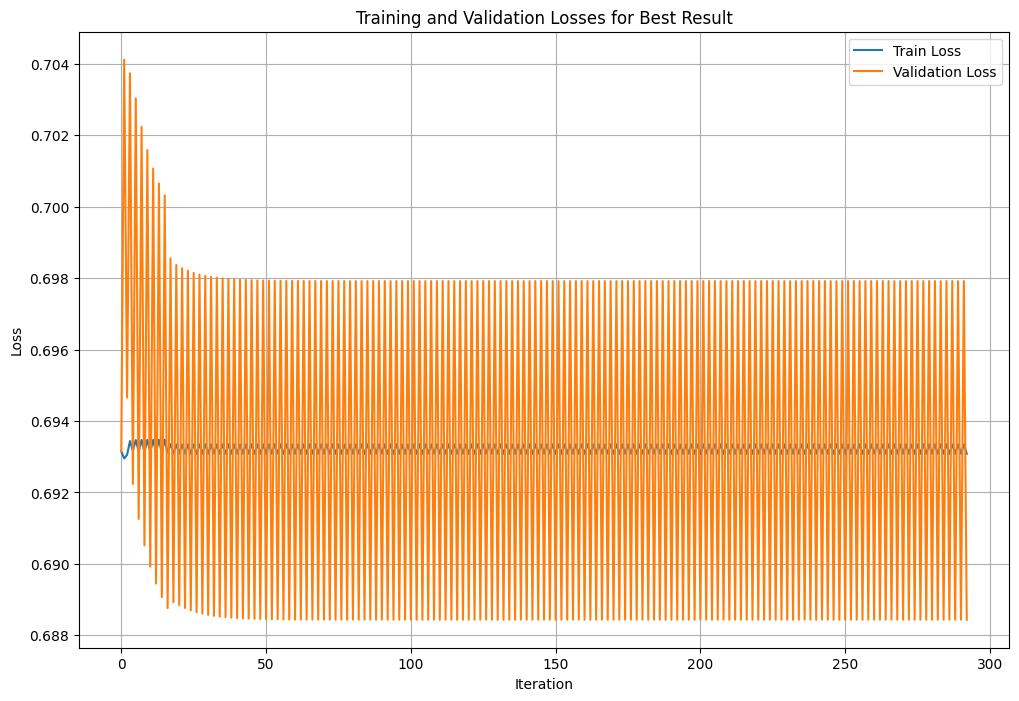

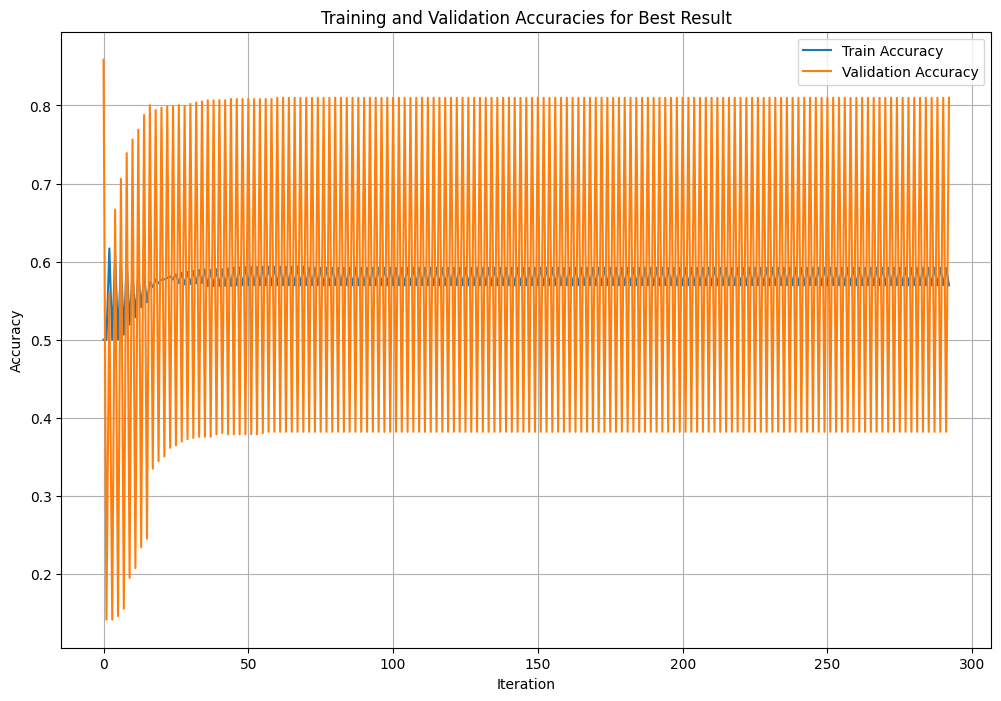

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Features and target
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Min-max scaling function
def min_max_scaling(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Apply min-max scaling
X = min_max_scaling(X).values
y = y.values

# Sigmoid function with clipping
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function with clipping
def compute_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Accuracy calculation
def calculate_accuracy(y_true, y_pred):
    y_pred_classes = [1 if i > 0.5 else 0 for i in y_pred]
    return np.mean(y_true == y_pred_classes)

# Gradient Descent for Logistic Regression with Early Stopping and Regularization
def gradient_descent(X, y, X_val, y_val, lr=0.01, num_iters=1000, patience=10, l1_reg=0.0, l2_reg=0.0):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    for i in range(num_iters):
        # Forward pass
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        # Compute train loss and accuracy
        train_loss = compute_loss(y, y_pred) + l1_reg * np.sum(np.abs(weights)) + l2_reg * np.sum(weights**2)
        train_accuracy = calculate_accuracy(y, y_pred)
        
        # Validation forward pass
        val_linear_model = np.dot(X_val, weights) + bias
        val_pred = sigmoid(val_linear_model)
        
        # Compute validation loss and accuracy
        val_loss = compute_loss(y_val, val_pred) + l1_reg * np.sum(np.abs(weights)) + l2_reg * np.sum(weights**2)
        val_accuracy = calculate_accuracy(y_val, val_pred)
        
        # Record metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break
        
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) + l1_reg * np.sign(weights) + 2 * l2_reg * weights
        db = (1 / m) * np.sum(y_pred - y)
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias, train_losses, val_losses, train_accuracies, val_accuracies

# Split the dataset into train, test, validation (70:15:15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Handle class imbalance by oversampling the minority class in the training set
X_train_minority, y_train_minority = resample(X_train[y_train == 1], y_train[y_train == 1],
                                              replace=True, n_samples=len(y_train[y_train == 0]), random_state=42)
X_train = np.vstack((X_train_minority, X_train[y_train == 0]))
y_train = np.hstack((y_train_minority, y_train[y_train == 0]))

# Define a range of learning rates and regularization parameters
learning_rates = [0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1]
l1_regs = [0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1]
l2_regs = [0.001, 0.05, 0.01, 0.5, 0.1, 0.5, 1]

# Store results
results = []

# Experiment with different learning rates and regularization parameters
for lr in learning_rates:
    for l1_reg in l1_regs:
        for l2_reg in l2_regs:
            weights, bias, train_losses, val_losses, train_accuracies, val_accuracies = gradient_descent(
                X_train, y_train, X_val, y_val, lr=lr, num_iters=1000, patience=10, l1_reg=l1_reg, l2_reg=l2_reg)

            # Validation predictions
            val_pred = sigmoid(np.dot(X_val, weights) + bias)
            val_pred_classes = [1 if i > 0.5 else 0 for i in val_pred]

            # Compute metrics
            accuracy = calculate_accuracy(y_val, val_pred)
            precision = precision_score(y_val, val_pred_classes, zero_division=0)
            recall = recall_score(y_val, val_pred_classes, zero_division=0)
            f1 = f1_score(y_val, val_pred_classes, zero_division=0)

            results.append({
                'lr': lr,
                'l1_reg': l1_reg,
                'l2_reg': l2_reg,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'train_losses': train_losses,
                'val_losses': val_losses,
                'train_accuracies': train_accuracies,
                'val_accuracies': val_accuracies
            })

# Find the best result based on F1 score
best_result = max(results, key=lambda x: x['f1'])

print("\nBest Result:")
print(f"Learning Rate: {best_result['lr']}")
print(f"L1 Regularization: {best_result['l1_reg']}")
print(f"L2 Regularization: {best_result['l2_reg']}")
print(f"Validation Accuracy: {best_result['accuracy']:.4f}")
print(f"Validation Precision: {best_result['precision']:.4f}")
print(f"Validation Recall: {best_result['recall']:.4f}")
print(f"Validation F1 Score: {best_result['f1']:.4f}")

# Plot training and validation losses for the best result
plt.figure(figsize=(12, 8))
plt.plot(best_result['train_losses'], label='Train Loss')
plt.plot(best_result['val_losses'], label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for Best Result')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracies for the best result
plt.figure(figsize=(12, 8))
plt.plot(best_result['train_accuracies'], label='Train Accuracy')
plt.plot(best_result['val_accuracies'], label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Best Result')
plt.legend()
plt.grid(True)
plt.show()